# Problem Statement & Business Goal

A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

The company is looking at prospective properties to buy to enter the market. We have build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 

The company wants to know:

1.  Which variables are significant in predicting the price of a house
2.  How well those variables describe the price of a house.

## 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
SH_AUS = pd.read_csv("train.csv")

In [3]:
# display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_columns', SH_AUS.shape[1])

In [4]:
# Let's take a look at the first few rows
SH_AUS.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Let's look at the number of rows and columns in the dataset
SH_AUS.shape

(1460, 81)

In [6]:
# Getting insights of the numerical features
SH_AUS.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Observations:**
- Scaling is required before building a model as many of the features lie on different scale.

In [7]:
SH_AUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Observations:** 
-  Few of the columns have missing values which has to be imputed if required and few of the columns have to be removed since the amount of missing values is huge.

### 1.1 Set the Datatype

In [8]:
# Check number of unique values in all columns to identify which columns has to be converted to categorical type.
unique_vals = []
dtypes = []
for col in SH_AUS.columns:
    unique_vals.append(len(SH_AUS[col].unique()))
    dtypes.append(SH_AUS[col].dtype)
df = pd.DataFrame({
    'Column': SH_AUS.columns,
    'Unique_Count': unique_vals,
    'Data Type': dtypes
})
# View all the observations of this dataframe.
pd.set_option('display.max_rows', SH_AUS.shape[1])
print(df.sort_values('Unique_Count'))
pd.set_option('display.max_rows', 50)

           Column  Unique_Count Data Type
41     CentralAir             2    object
5          Street             2    object
9       Utilities             2    object
65     PavedDrive             3    object
6           Alley             3    object
48   BsmtHalfBath             3     int64
50       HalfBath             3     int64
11      LandSlope             3    object
52   KitchenAbvGr             4     int64
72         PoolQC             4    object
47   BsmtFullBath             4     int64
49       FullBath             4     int64
27      ExterQual             4    object
53    KitchenQual             4    object
8     LandContour             4    object
7        LotShape             4    object
56     Fireplaces             4     int64
60   GarageFinish             4    object
74    MiscFeature             5    object
77         YrSold             5     int64
61     GarageCars             5     int64
32   BsmtExposure             5    object
31       BsmtCond             5   

In [9]:
# Following columns has finite list of unique values and can be considered as categorical.

category_cols = ['CentralAir', 'Street', 'Utilities', 'PavedDrive', 'Alley', 'BsmtHalfBath', 'HalfBath', 'LandSlope', 
                 'FullBath', 'GarageFinish', 'Fireplaces', 'LotShape', 'KitchenQual', 'KitchenAbvGr', 'PoolQC', 'LandContour',
                 'ExterQual', 'BsmtFullBath', 'ExterCond', 'BsmtQual', 'HeatingQC', 'GarageCars', 'BsmtExposure', 'MasVnrType',
                 'Fence', 'BldgType', 'MSZoning', 'LotConfig', 'RoofStyle', 'Foundation', 'FireplaceQu', 'SaleCondition', 
                 'GarageType', 'BsmtFinType1', 'BsmtFinType2', 'BedroomAbvGr', 'HouseStyle', 'OverallQual', 'OverallCond',
                 'SaleType', 'Condition1', 'MiscFeature', 'BsmtCond', 'Heating', 'GarageQual', 'Electrical', 'GarageCond', 
                 'Functional', 'Condition2', 'RoofMatl', 'TotRmsAbvGrd', 'MoSold', 'MSSubClass', 'Exterior1st', 'Exterior2nd']
for col in category_cols:
    SH_AUS[col] = SH_AUS[col].astype('category')

In [10]:
#Let us Check the if the dtypes are now updated
SH_AUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   ca

## 2. Data Cleansing

### 2.1 Treating Missing Values

In [11]:
#Checking percentage of missing values in each column
percent_missing = (SH_AUS.isnull().sum() / SH_AUS.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(15)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
dtype: float64

In [12]:
#We will drop the columns with 45% and more missing values - imputing them will result in incorrect assumption.Also as per
#Data dictionary the reason behind missing values in Pool,Alley and Fence is because the properties simply doesn't have it

SH_AUS.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis = 1,inplace = True)

In [13]:
#Lets check if there are further missing values
percent_missing = (SH_AUS.isnull().sum() / SH_AUS.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(15)

LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
PavedDrive       0.000000
dtype: float64

#### Note- 
-  From the data dictionary we can infer for the below columns if the value is missing that means the structure was never constructed.
-  So we will impute the columns with an attribute - 'NoBuilt'

In [14]:
# Imputing the missing values

vars_to_impute_nobuilt = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                          'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for var in vars_to_impute_nobuilt:
    if str(SH_AUS[var].dtypes) == 'category':
        SH_AUS[var].cat.add_categories('NoBuilt', inplace=True)
    SH_AUS[var].fillna('NoBuilt', axis=0, inplace=True)

#### Note- 
-  For below categorical columns as evident from the below graph 1 category has more frequency of data than others.
-  So we will impute these columns with it's mode value.

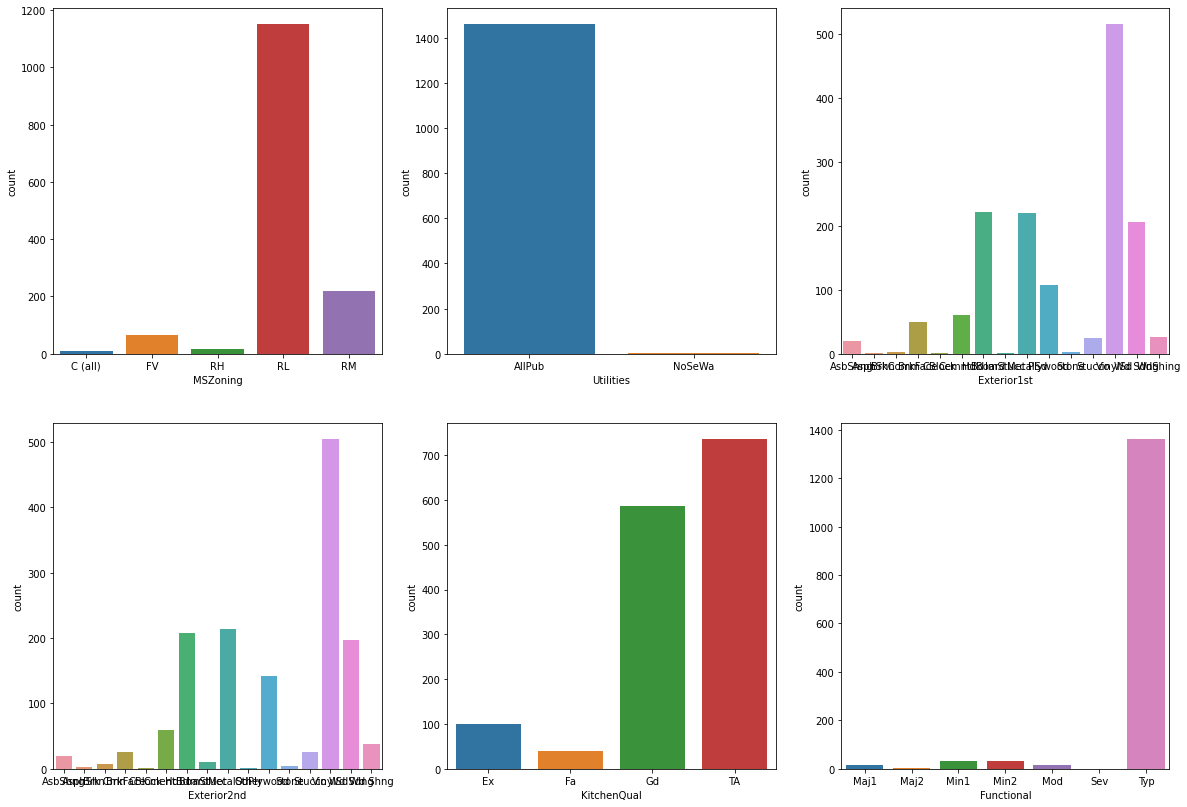

In [15]:
#Let us visualise the remaining features with missing values
plt.figure(figsize=(20, 14))
plt.subplot(2,3,1)
sns.countplot(x = 'MSZoning', data = SH_AUS)
plt.subplot(2,3,2)
sns.countplot(x = 'Utilities',  data = SH_AUS)
plt.subplot(2,3,3)
sns.countplot(x = 'Exterior1st', data = SH_AUS)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior2nd', data = SH_AUS)
plt.subplot(2,3,5)
sns.countplot(x = 'KitchenQual', data = SH_AUS)
plt.subplot(2,3,6)
sns.countplot(x = 'Functional', data = SH_AUS)
plt.show()

In [16]:
# Columns which have to be imputed with mode
mode_impute_vars = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional']
for var in mode_impute_vars:
    SH_AUS[var].fillna(SH_AUS[var].mode()[0], axis=0, inplace=True)

#### Note- 
-  From the data dictionary we can infer for scenarios where the property doesn't have a basement or garage we can fill it's 
   corresponding sister columns depicting area as '0'.

In [17]:
# Imputing the Area features for basement and garage with '0'
area_vars = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
for col in area_vars:
    SH_AUS[col].fillna(0, axis=0, inplace=True)

In [18]:
#Lets check if there are further missing values
percent_missing = (SH_AUS.isnull().sum() / SH_AUS.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(15)

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
BedroomAbvGr     0.000000
Fireplaces       0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
FullBath         0.000000
HalfBath         0.000000
BsmtHalfBath     0.000000
BsmtFullBath     0.000000
dtype: float64

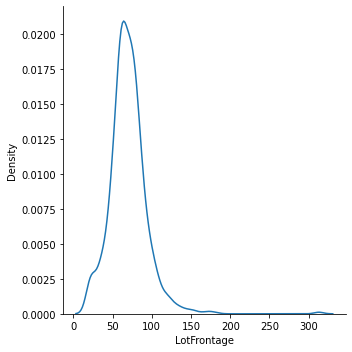

In [19]:
#Lets check the distribution of the below attribute - 
sns.displot(SH_AUS['LotFrontage'], kind='kde')
plt.show()

In [20]:
SH_AUS['LotFrontage'].value_counts().head()

60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: LotFrontage, dtype: int64

In [21]:
# The frequency of distribution is high at 60 for LotFrontage.Imputing all missing values in this column with 60.
SH_AUS.LotFrontage.fillna(60, inplace=True)

In [22]:
# For SaleType, there is a value called "Other". For missing values, we can impute with "Oth".
SH_AUS.SaleType.fillna('Oth', axis=0, inplace=True)

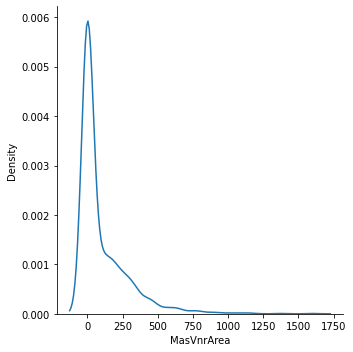

In [23]:
#Lets check the distribution of the below attribute - 
sns.displot(SH_AUS['MasVnrArea'], kind='kde')
plt.show()

In [24]:
SH_AUS['MasVnrArea'].value_counts().head()

0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
Name: MasVnrArea, dtype: int64

In [25]:
# The frequency of distribution is high at 0 for MasVnrArea. Imputing all missing values in this column with 0.
SH_AUS.MasVnrArea.fillna(0, inplace=True)

In [26]:
# Since there are only 0.068% of missing values for Electrical variable, we will inpute this feature with it's mode.
SH_AUS.Electrical.fillna(SH_AUS.Electrical.mode()[0], axis=0, inplace=True)

#### Note- 
-  We have roughly 5.5% of missing values in Garage Year Build feature.We know the reason behind this is because the structure 
   was never build for the property.
-  We will impute the garage built year with the house built year.

In [27]:
def garagebuilt_year(garageYr, builtYr):    
    if pd.isnull(garageYr):
        return builtYr
    else:
        return garageYr
SH_AUS['GarageYrBlt'] = SH_AUS.apply(lambda row: garagebuilt_year(row.GarageYrBlt, row.YearBuilt),axis=1)

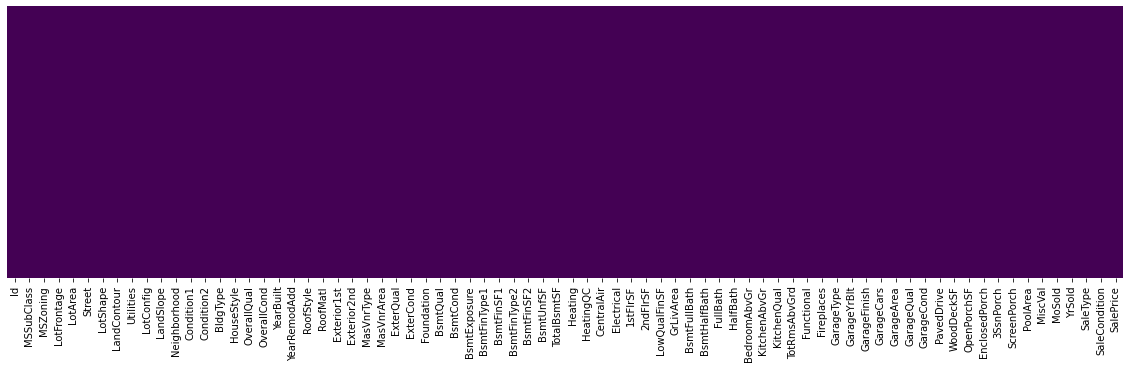

In [28]:
# The missing values for all the independent variables are handled.
plt.figure(figsize=(20,5))
sns.heatmap(SH_AUS.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

**Observations:**
- As evident from above all the missing values are now addressed.

In [29]:
print('There are {} rows and {} columns left after the missing value treatment.'.format(*SH_AUS.shape))

There are 1460 rows and 76 columns left after the missing value treatment.


In [30]:
#Lets us now check which features will have very little significance in the final model.
#Rational for this task is to identify columns which have more than 90% of 1 type of value

categorical_vars = SH_AUS.select_dtypes(include=['object', 'category']).columns
vars_to_remove = []
for var in categorical_vars:
    unique_vals_per_col = len(SH_AUS[var].unique())
    most_repeated_prcnt = round(100*SH_AUS[var].value_counts()[0]/len(SH_AUS))
    if most_repeated_prcnt >= 90:
        vars_to_remove.append(var)
print('Below variables doesnt have significant variance in data and would not necessarily add any value to the model\n')
print(vars_to_remove,end = '')

Below variables doesnt have significant variance in data and would not necessarily add any value to the model

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive']

In [31]:
# FOr the above features there is no variance so these won't add value to our predictions and are removed.
SH_AUS.drop(vars_to_remove, axis=1, inplace=True)

In [32]:
print('There are {} rows and {} columns left after initial feature selection.'.format(*SH_AUS.shape))

There are 1460 rows and 60 columns left after initial feature selection.


### 2.2 Outlier Treatment

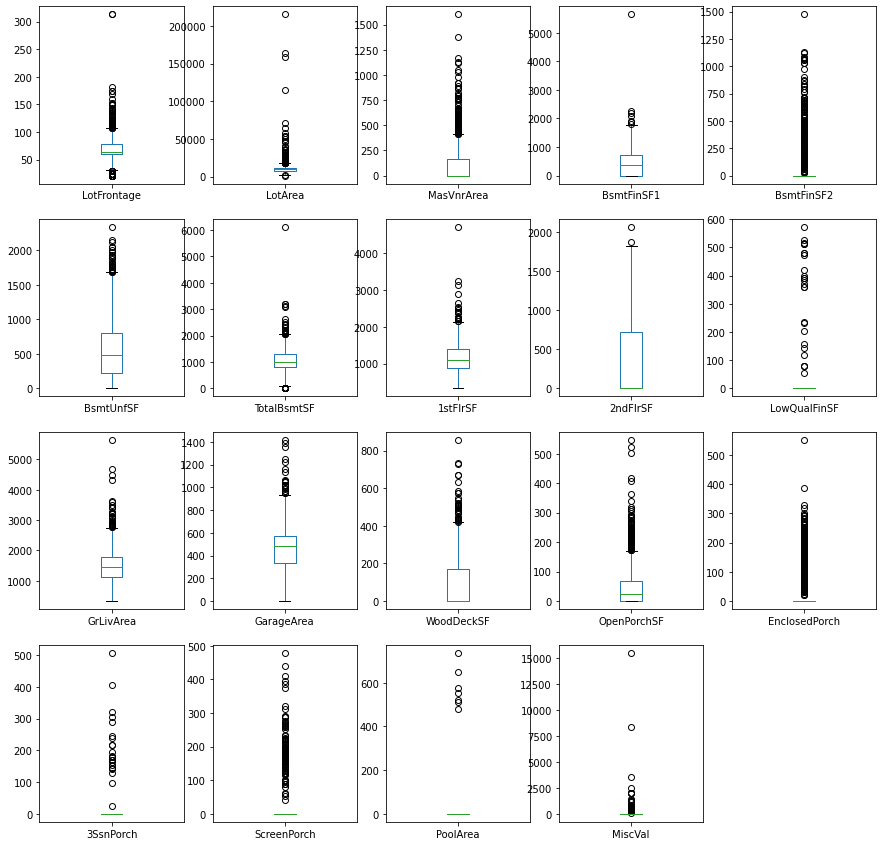

In [33]:
# Let us first define a function which creates box plots for all the numeric columns

def num_var_box_plot(df=SH_AUS):
    num_data = df.select_dtypes(include='number')
    num_vars_per_row = 5
    num_rows = int(np.ceil(len(num_data.columns)/num_vars_per_row))
    fig_num = 0
    plt.figure(figsize=(15,15))
    for col in num_data:
        fig_num += 1
        plt.subplot(num_rows, num_vars_per_row, fig_num)
        num_data[col].plot.box()
    plt.show()
    
num_var_box_plot(SH_AUS.drop(['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'SalePrice'], axis=1))

**Observations:** 
-  For few of the features depicted above,outliers removal would result in the whole feature turned into meaningless.
-  We would prefer to drop these columns instead.

In [34]:
SH_AUS.drop(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

In [35]:
#Lets cap the remaining column values between 5th and 95th percentile

num_data = SH_AUS.select_dtypes(include='number')

# We will not consider outliers for date features and the target variable.

num_data.drop(['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'SalePrice'], axis=1, inplace=True)
vars_to_treat_outliers = num_data.columns

#A small function to filter out the data
lower_prcntle = 5
upper_prcntle = 100 - lower_prcntle
def treat_outliers(low, high, val):
    if val < low:
        return low
    elif val > high:
        return high
    else:
        return val

for num_var in vars_to_treat_outliers:
    lower_prnctle_val = num_data[num_var].quantile(lower_prcntle/100)
    upper_prcntle_val = num_data[num_var].quantile(upper_prcntle/100)
    num_data[num_var] = num_data.apply(lambda row: treat_outliers(lower_prnctle_val, upper_prcntle_val, row[num_var]),axis=1)

# Lets apply the changes to our original dataframe

SH_AUS[num_data.columns] = num_data

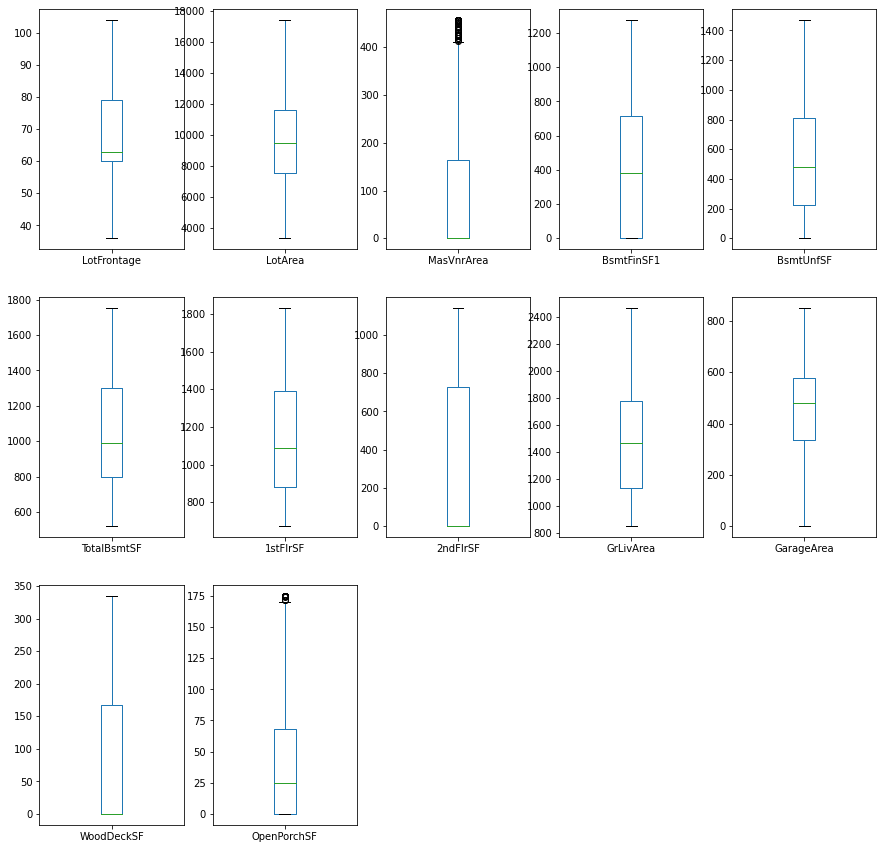

In [36]:
# Lets check once is the outliers are handled
num_var_box_plot(num_data)

In [37]:
SH_AUS.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 1])

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,67.515993,9682.319212,1971.267808,1984.865753,92.047945,431.089041,556.537671,1055.950616,1151.861370,337.731267,1498.922123,1976.507534,468.187877,88.889726,42.864829,2007.815753,180921.195890
std,421.610009,16.874101,3469.967624,30.202904,20.645407,140.590668,412.214952,414.582219,346.901853,333.684061,415.255848,450.732225,26.306739,202.064708,109.391899,53.144211,1.328095,79442.502883
min,1.000000,35.950000,3311.700000,1872.000000,1950.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,848.000000,1872.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
10%,146.900000,49.000000,5000.000000,1924.900000,1950.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,912.000000,1939.000000,240.000000,0.000000,0.000000,2006.000000,106475.000000
25%,365.750000,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,1959.000000,334.500000,0.000000,0.000000,2007.000000,129975.000000
50%,730.500000,63.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,1978.000000,480.000000,0.000000,25.000000,2008.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,2001.000000,576.000000,168.000000,68.000000,2009.000000,214000.000000
90%,1314.100000,92.000000,14381.700000,2006.000000,2006.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,2006.000000,757.100000,262.000000,130.000000,2010.000000,278000.000000
100%,1460.000000,104.000000,17401.150000,2010.000000,2010.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,2010.000000,850.100000,335.000000,175.050000,2010.000000,755000.000000


In [38]:
print('There are {} rows and {} columns left after addressing the outlier issues.'.format(*SH_AUS.shape))

There are 1460 rows and 53 columns left after addressing the outlier issues.


### 2.3 Normalising the 'Target Variable'
-  It is important to scale the variables for getting meaningful coefficients and reducing the time it takes for Gradient descent to do it's job.Lets first start with the target variable - `'Sales Price'`

<Figure size 360x216 with 0 Axes>

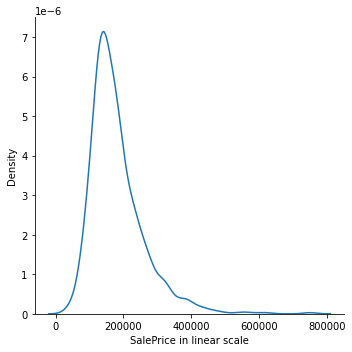

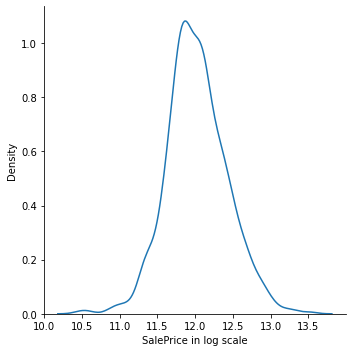

In [39]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(5,3))
sns.displot(data=SH_AUS, x='SalePrice', kind='kde')
plt.xlabel('SalePrice in linear scale')
sns.displot(np.log(SH_AUS['SalePrice']), kind='kde')
plt.xlabel('SalePrice in log scale')
plt.show()

**Observations:**
-  The target variable `SalePrice` is right skewed. We can take log transformation of the target variable to handle skewness.

In [40]:
#Normalising the Target Variable
SH_AUS['SalePrice'] = np.log(SH_AUS['SalePrice'])

## 3. EDA

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we will also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

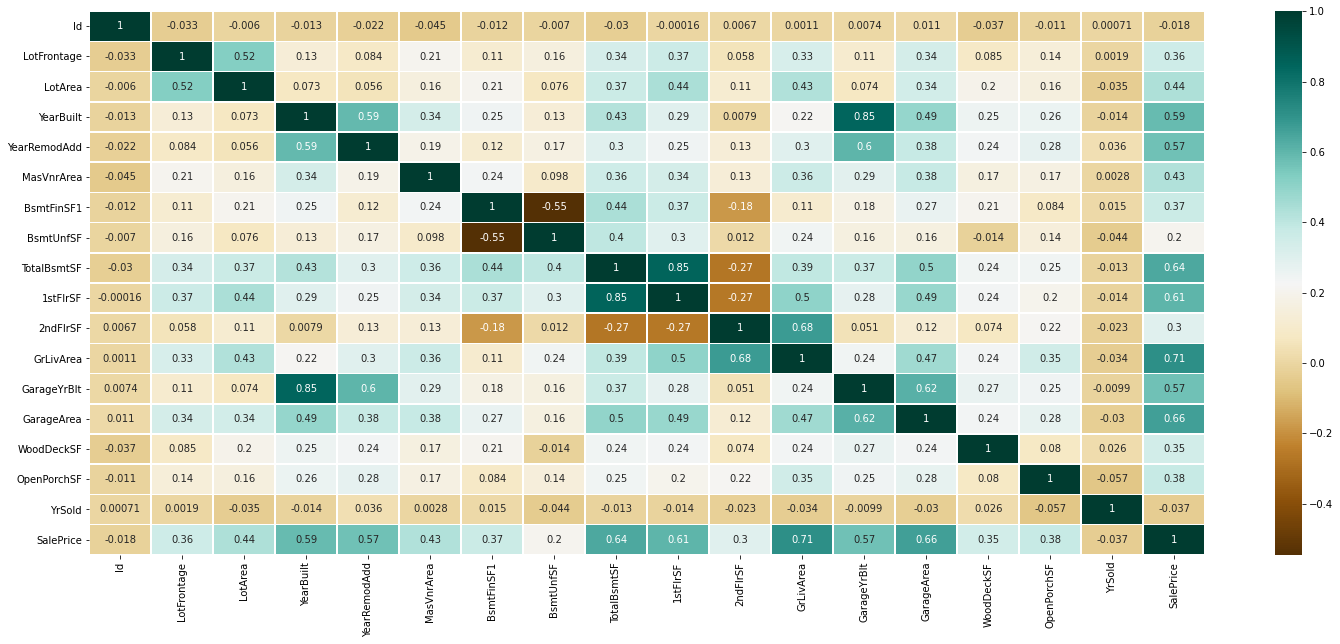

In [41]:
#Let us first plot a heatmap for checking correlation
plt.figure(figsize=(25,10))
sns.heatmap(SH_AUS.corr(), annot=True, cmap='BrBG',linewidths=.5)
plt.show()

**Observations:** 
- There is multi-collinearity between independent features.
- Above features have stronger correlation with the target variable which includes **YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, etc.**


Thus, while building the model, we'll have to pay attention to multicollinearity.

### 3.1 Univariate Analysis

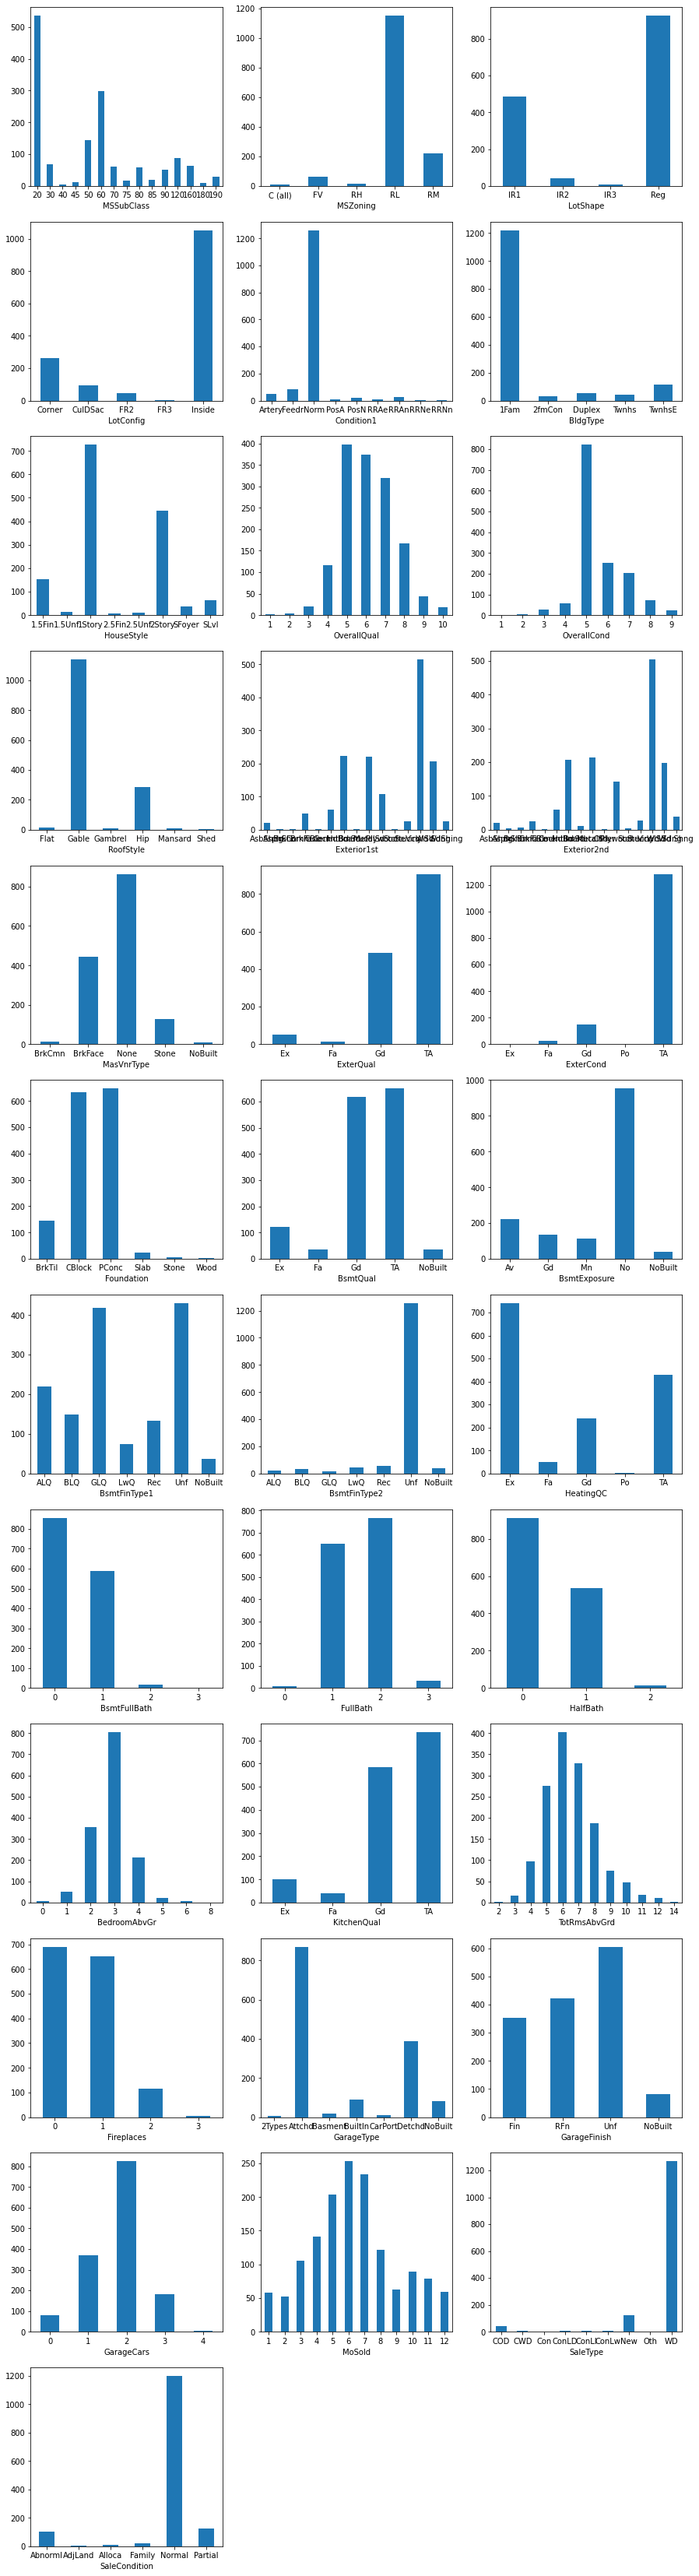

In [42]:
# Univariate analysis of categorical columns
cat_vars = SH_AUS.select_dtypes(include=['category']).columns
num_vars_per_row = 3
num_rows = int(np.ceil(len(cat_vars)/num_vars_per_row))
fig_num = 0
plt.figure(figsize=(15,60))
for var in cat_vars:
    fig_num += 1
    plt.subplot(num_rows, num_vars_per_row, fig_num)
    SH_AUS[var].value_counts().sort_index().plot.bar()
    plt.xlabel(var)
    plt.xticks(rotation=0)
plt.show()

**Observations:** 
- `MSZoning`: Properties in Residential Low Density (RL) zone is being sold more frequently.
- `LotShape`: Preference is to go for regular or slightly irregular shape houses. 
- `Foundation`: Cinder Block & Poured Concrete are commonly used type for foundation.
- `HeatingQC`: Houses with excellent heating quality is sold quickly.
- `SaleCondition`: Houses with normal sales conditions are preffered by buyers.

### 3.2 Bivariate Analysis

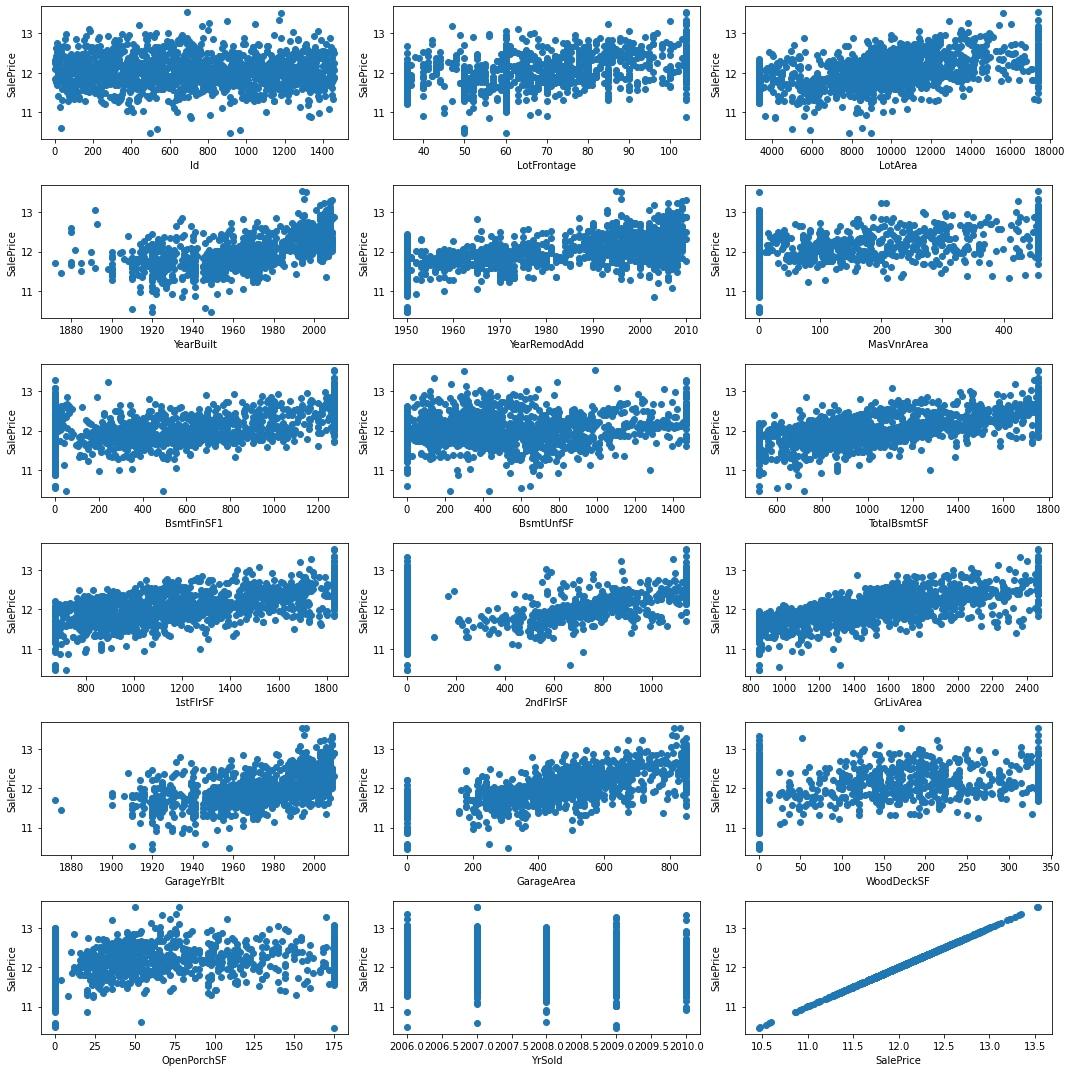

In [43]:
#I am chosing a subset of numerical columns for plotting - this will focus only on the key independent variables

num_data = SH_AUS.select_dtypes(include='number')
num_var_per_row = 3
num_rows = int(np.ceil(len(num_data.columns)/num_var_per_row))
fig_num = 0

plt.figure(figsize=(15,15))
for var in num_data:
    fig_num += 1
    plt.subplot(num_rows, num_var_per_row, fig_num)
    plt.tight_layout()
    plt.scatter(num_data[var], num_data['SalePrice'])
    plt.xlabel(var)
    plt.ylabel('SalePrice')
plt.show()

**Observations:** 
- `Neighbourhood`: Properties in Northridge Heights and Stone Brook has higher sales price on average.
- `MSSubclass`: 2-STORY 1946 & NEWER are in demand. 
- `MasVnrType`: Brick Face & Stone are commonly used type for walls.
- `HouseStyle`: 2Story & Two and one-half story: 2nd level unfinished is sold quickly.
- `RoofStyle`: Houses with Hip styles roofs are preffered by buyers.

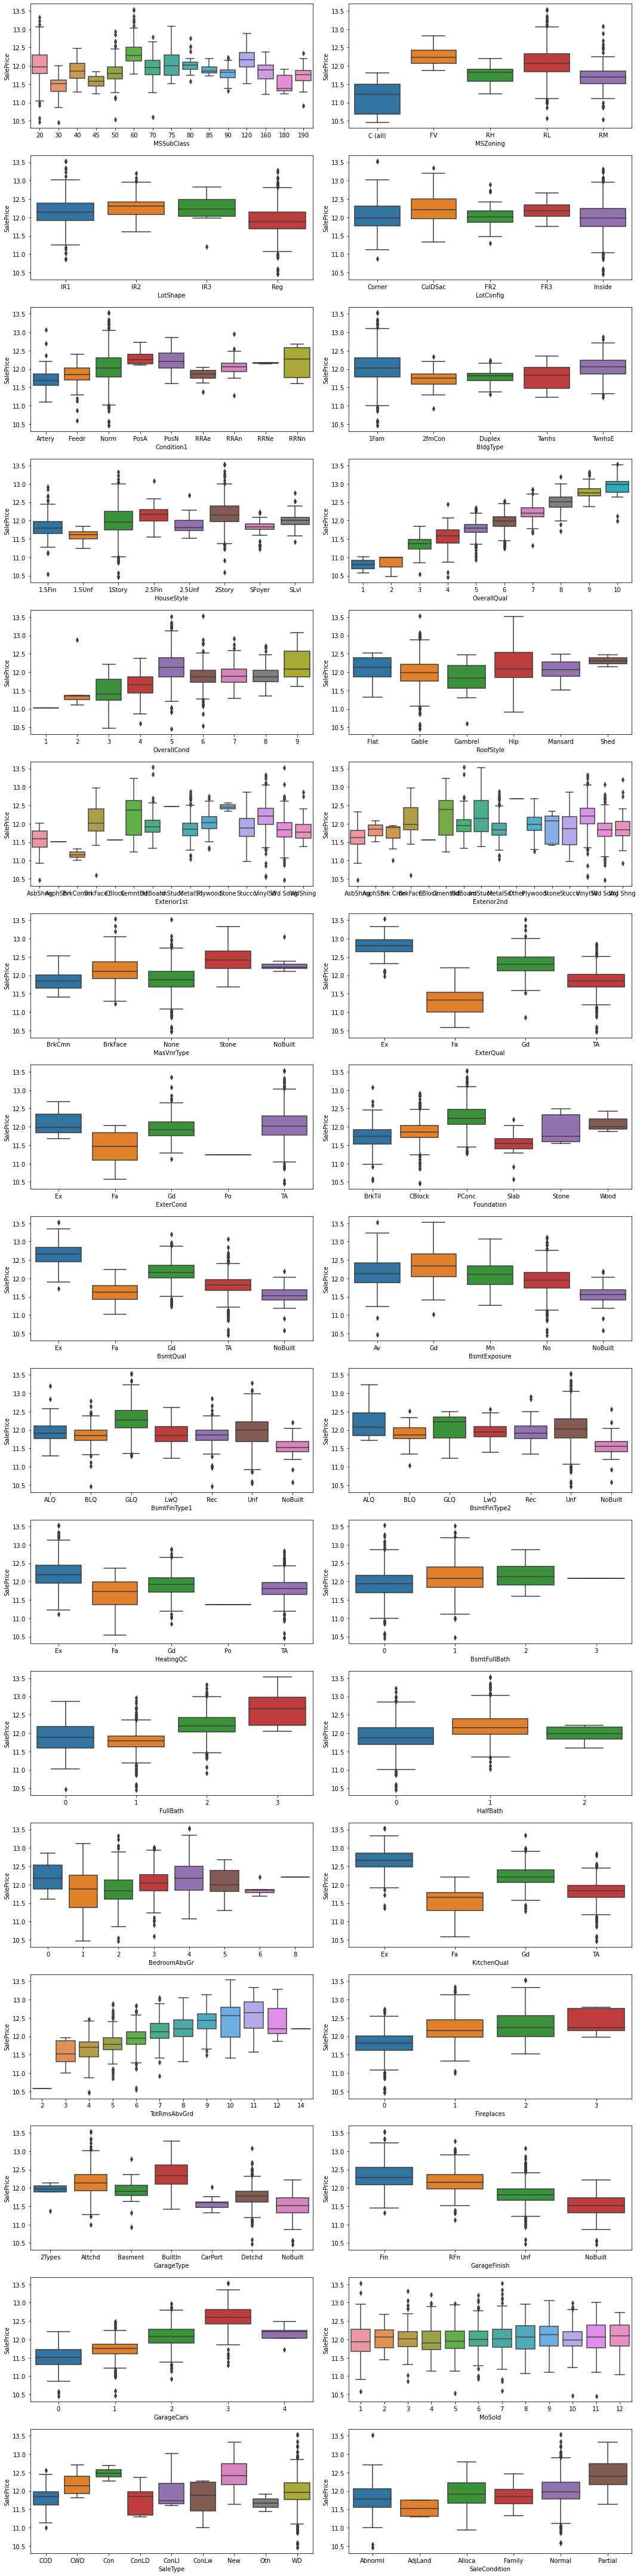

In [44]:
# Now we will analyse categorical columns with the target variable - Sales Price

cat_vars = SH_AUS.select_dtypes(include=['category']).columns
num_vars_per_row = 2
num_rows = int(np.ceil(len(cat_vars)/num_vars_per_row))
fig_num = 0
plt.figure(figsize=(15,60))
for var in cat_vars:
    fig_num += 1
    plt.subplot(num_rows, num_vars_per_row, fig_num)
    plt.tight_layout()
    sns.boxplot(SH_AUS[var], SH_AUS['SalePrice'])
    plt.xlabel(var)
plt.show()

**Observations:**
- `OverallQual` & `OverallCond`: When the overall quality is good, the sale price goes up.
- `BsmtExposure`: Sale price increases as the exposue of the basement increases.
- `Fireplaces`: More the number of fireplaces, greater the sale price for the property.
- `GarageCars`: A bigger garage space means the price of the property is higher.

### 3.2 Feature Engineering

#### 3.2.1 -Deriving new columns

In [45]:
# Age of a house, Garage age can be determined by subtracting year sold with respective year.
SH_AUS['Age'] = SH_AUS.YrSold - SH_AUS.YearBuilt
SH_AUS['AgeSinceRemod'] = SH_AUS.YrSold - SH_AUS.YearRemodAdd
SH_AUS['GarageAge'] = SH_AUS.YrSold - SH_AUS.GarageYrBlt
SH_AUS.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

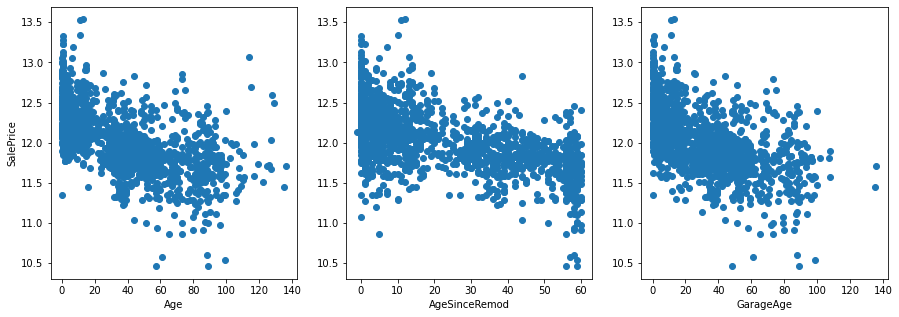

In [46]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(data=SH_AUS, x='Age', y='SalePrice')
plt.xlabel('Age')
plt.ylabel('SalePrice')
plt.subplot(132)
plt.scatter(data=SH_AUS, x='AgeSinceRemod', y='SalePrice')
plt.xlabel('AgeSinceRemod')
plt.subplot(133)
plt.scatter(data=SH_AUS, x='GarageAge', y='SalePrice')
plt.xlabel('GarageAge')
plt.show()

**Observations:** 
-  It is clear that as the age of the house increases, the sale price goes down.

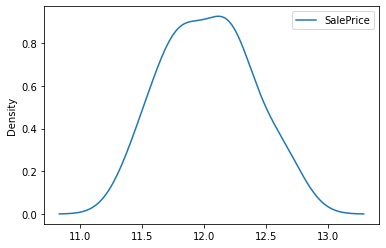

,SalePrice
count,25.000000
mean,12.030073
std,0.347338
min,11.446889
5%,11.489191
50%,12.090689
95%,12.612626
max,12.676000


In [47]:
#Let us look at the data spread of the Neighbourhood column - houses in good neighbourhood must call for for premium
df1 = pd.pivot_table(SH_AUS[['SalePrice', 'Neighborhood']], index=['Neighborhood'])
df1.sort_values('SalePrice').plot.kde()
plt.show()
df1.describe(percentiles=[0.05, 0.95])

**Observations:** 
-  It is desirable to group the neighborhood feature based on below logic - 
-  **0 - under 5th percentile, 1 - 5th to 95th percentile, 2 - above 95th percentile**

In [48]:
#Lets write a small function to achieve this

def neigh_levels(var):
    x = df1.loc[var].SalePrice
    if x < df1.quantile(0.05).SalePrice:
        return 0
    elif df1.quantile(0.05).SalePrice < x < df1.quantile(0.95).SalePrice:
        return 1
    else:
        return 2
SH_AUS['NeighborhoodGrp'] = SH_AUS.Neighborhood.apply(neigh_levels).astype('category')

#Finally we will drop the original columns as it add no value now
SH_AUS.drop('Neighborhood', axis=1, inplace=True)

In [49]:
# All quality related features can be classified as - Poor, Average and Good.
# The same can be encoded as 0, 1 and 2 respectively.
def qual_rating(x):
    if x <= 3:
        return 0
    elif x <= 6:
        return 1
    else:
        return 2

SH_AUS['OverallQual'] = SH_AUS.OverallQual.apply(qual_rating).astype('category')
SH_AUS['OverallCond'] = SH_AUS.OverallCond.apply(qual_rating).astype('category')
SH_AUS['BedroomAbvGr'] = SH_AUS.BedroomAbvGr.apply(qual_rating).astype('category')

In [50]:
# Features describing quality of the structure -we will encode as below

quality_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'HeatingQC', 'KitchenQual']
for feat in quality_features:
    SH_AUS[feat] = SH_AUS[feat].map({'NoBuilt': 0, 'Po': 1, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 3}).astype('category')

In [51]:
# Exposure can also be encoded as numbers

SH_AUS['BsmtExposure'] = SH_AUS['BsmtExposure'].map({'NoBuilt': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}).astype('category')

-  Number of rooms is an important feature considered by every house buyers.
-  For small families prefer lesser number of rooms while larger families will opt for big houses. 
-  This is an important feature for model building and has to be encoded as dummy variables.

In [52]:
#Lets use a function to accomplish the job 

def rooms(x):
    if x <= 5:
        return 'less_rooms'
    elif x <= 9:
        return 'med_rooms'
    else:
        return 'more_rooms'
SH_AUS['TotRmsAbvGrd'] = SH_AUS.TotRmsAbvGrd.apply(rooms)

#### 3.2.2 -One hot encoding for categorical features

In [53]:
hot_encoding = ['MSZoning', 'LotShape', 'LotConfig', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
             'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'TotRmsAbvGrd', 'GarageType',
             'GarageFinish', 'SaleType', 'SaleCondition']
SH_AUS = pd.get_dummies(data=SH_AUS, columns=hot_encoding)

In [54]:
SH_AUS.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,Age,AgeSinceRemod,GarageAge,NeighborhoodGrp,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_NoBuilt,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_NoBuilt,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_NoBuilt,TotRmsAbvGrd_less_rooms,TotRmsAbvGrd_med_rooms,TotRmsAbvGrd_more_rooms,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoBuilt,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_NoBuilt,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450.0,2,1,196.0,3,2,3,1,706.0,150.0,856.0,3,856.0,854.0,1710.0,1,2,1,0,3,0,2,548.0,0.0,61.0,2,2008,12.247694,5,5,5.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600.0,1,2,0.0,2,2,3,4,978.0,284.0,1262.0,3,1262.0,0.0,1262.0,0,2,0,0,2,1,2,460.0,298.0,0.0,5,2007,12.109011,31,31,31.0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250.0,2,1,162.0,3,2,3,2,486.0,434.0,920.0,3,920.0,866.0,1786.0,1,2,1,0,3,1,2,608.0,0.0,42.0,9,2008,12.317167,7,6,7.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550.0,2,1,0.0,2,2,2,1,216.0,540.0,756.0,3,961.0,756.0,1717.0,1,1,0,0,3,1,3,642.0,0.0,35.0,2,2006,11.849398,91,36,8.0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [55]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(SH_AUS, train_size=0.7, test_size=0.3, random_state=100)

In [56]:
print('There are {} observations in the training set and {} observations in the test set'.format(df_train.shape[0], df_test.shape[0]))

There are 1021 observations in the training set and 438 observations in the test set


In [57]:
# Now we will split training dataset into train and hold-out set. Actual testing set will be used for final predictions.
X = df_train.drop(['Id', 'SalePrice'], axis=1)
y = df_train.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [58]:
#Lets quickly check if the split is done correctly
print('The training set contains {} rows and {} columns '. format(*X_train.shape))
print('The training set contains {} rows and {} columns '. format(*X_test.shape))
print('The training set contains {} rows'. format(*y_train.shape))
print('The training set contains {} rows'. format(*y_test.shape))

The training set contains 714 rows and 160 columns 
The training set contains 307 rows and 160 columns 
The training set contains 714 rows
The training set contains 307 rows


### 4.1 Scaling the features

- Data is already split into train and test sets,now we will scale the data
- Let's scale all these columns using MinMaxScaler.
- For test set we will use transform only since the values are already fit using the training set.

In [59]:
scaler = MinMaxScaler()
cols_to_scale = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
                 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
                 '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces',
                 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'Age',
                 'AgeSinceRemod', 'GarageAge', 'NeighborhoodGrp']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# For test set use transform only since the values are already fit using the training set.
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

In [60]:
# Check if all the variables lies within the range of 0 to 1 in training dataset.
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,Age,AgeSinceRemod,GarageAge,NeighborhoodGrp,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_NoBuilt,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_NoBuilt,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_NoBuilt,TotRmsAbvGrd_less_rooms,TotRmsAbvGrd_med_rooms,TotRmsAbvGrd_more_rooms,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoBuilt,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_NoBuilt,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000

**Observations:** 
-  Looks like we have scaled the data appropriately

### 4.2 Model Building

-  We will first build a linear regression model to assess the R2 and RMSE metrics

#### 4.2.1 Model Building -using Linear Regression

In [61]:
# Build a multiple linear regression model
lr = LinearRegression()
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('R2:Train =', r2_score(y_train, y_train_pred))
print('RMSE:Train =', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R2:Test =', r2_score(y_test, y_test_pred))
print('RMSE:Test =', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Clear sign of overfitting since the R2 score for test set is negative and MSE is too high. Let's build ridge and lasso regression models to counter overfitting.")

R2:Train = 0.9166358004926098
RMSE:Train = 0.11488506927997937
R2:Test = -5278740246340865.0
RMSE:Test = 28525609.39928211
Clear sign of overfitting since the R2 score for test set is negative and MSE is too high. Let's build ridge and lasso regression models to counter overfitting.


#### 4.2.2 Model Building -using Ridge Regression

In [62]:
lambdas = [0.001,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50, 100, 500, 1000]
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []
for lmda in lambdas:
    ridge_model = Ridge(alpha=lmda)
    ridge_model.fit(X_train, y_train)
    y_train_pred = ridge_model.predict(X_train)
    y_test_pred = ridge_model.predict(X_test)
    r2_train.append(r2_score(y_train, y_train_pred))
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    r2_test.append(r2_score(y_test, y_test_pred))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

In [63]:
# Let us create a dataframe which will help us in comparison

metric_df = pd.DataFrame(columns=['alpha', 'ridge_r2_train', 'ridge_r2_test', 'ridge_rmse_train', 'ridge_rmse_test'])
metric_df['alpha'] = lambdas
metric_df['ridge_r2_train'] = r2_train
metric_df['ridge_r2_test'] = r2_test
metric_df['ridge_rmse_train'] = rmse_train
metric_df['ridge_rmse_test'] = rmse_test
metric_df

,alpha,ridge_r2_train,ridge_r2_test,ridge_rmse_train,ridge_rmse_test
0,0.001,0.916636,0.881199,0.114885,0.135326
1,0.100,0.916597,0.882886,0.114912,0.134361
2,0.200,0.916507,0.884224,0.114974,0.133592
3,0.300,0.916389,0.885315,0.115055,0.132961
4,0.400,0.916255,0.886231,0.115147,0.132429
5,0.500,0.916111,0.887017,0.115246,0.131970
6,0.600,0.915961,0.887701,0.115349,0.131570
7,0.700,0.915807,0.888306,0.115455,0.131216
8,0.800,0.915651,0.888845,0.115562,0.130899
9,0.900,0.915493,0.889329,0.115670,0.130613


**Observations:** 
-  Among many an alpha value of **10** looks like providing the best result.

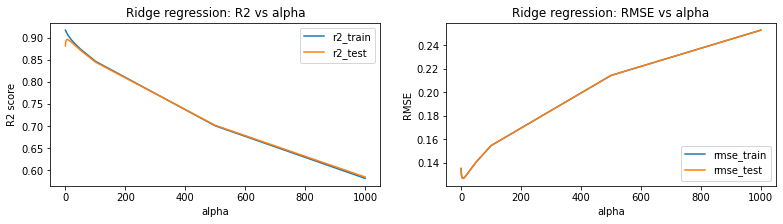

In [64]:
# Lets plot the metrics (MSE and R2) vs alpha to examine the trend
plt.figure(figsize=(13,3))
plt.subplot(121)
plt.plot(metric_df.alpha, metric_df.ridge_r2_train)
plt.plot(metric_df.alpha, metric_df.ridge_r2_test)
plt.title('Ridge regression: R2 vs alpha')
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.legend(['r2_train', 'r2_test'], loc='upper right')
plt.subplot(122)
plt.plot(metric_df.alpha, metric_df.ridge_rmse_test)
plt.plot(metric_df.alpha, metric_df.ridge_rmse_test)
plt.title('Ridge regression: RMSE vs alpha')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend(['rmse_train', 'rmse_test'], loc='lower right')
plt.show()

**Observations:** 
-  It is evident as the values of alpha increases **R2** decreases and **RMSE** increases

In [65]:
# Let us consider the alpha as 10 and build a final ridge regression model 
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

print('R2:Train =', r2_score(y_train, y_train_pred))
print('RMSE:Train =', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R2:Test =', r2_score(y_test, y_test_pred))
print('RMSE:Test =', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('For an alpha value of 10, the ridge regression model performs well enough for both train and test datasets')

R2:Train = 0.9038756137726147
RMSE:Train = 0.1233646094605828
R2:Test = 0.8946717267855537
RMSE:Test = 0.1274213691456735
For an alpha value of 10, the ridge regression model performs well enough for both train and test datasets


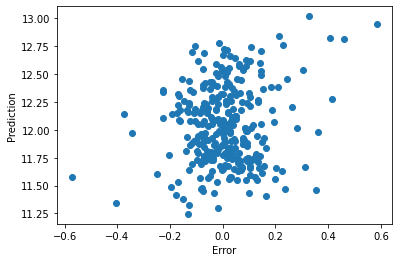

In [66]:
# We will also test for regression assumptions - Distribution of error terms
y_test_pred = ridge_model.predict(X_test)
res = y_test - y_test_pred
plt.scatter(res, y_test_pred)
plt.xlabel('Error')
plt.ylabel('Prediction')
plt.show()

**Observations:** 
-  It is evident the error terms are independent and doesn't display any visible pattern.

#### 4.2.3 Model Building -using Lasso Regression

In [67]:
lambdas = [0.001,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50, 100, 500, 1000]
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []
for lmda in lambdas:
    lasso_model = Lasso(alpha=lmda)
    lasso_model.fit(X_train, y_train)
    y_train_pred = lasso_model.predict(X_train)
    y_test_pred = lasso_model.predict(X_test)
    r2_train.append(r2_score(y_train, y_train_pred))
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    r2_test.append(r2_score(y_test, y_test_pred))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

In [68]:
# Let us create a dataframe which will help us in comparison
metric_df['lasso_r2_train'] = r2_train
metric_df['lasso_r2_test'] = r2_test
metric_df['lasso_rmse_train'] = rmse_train
metric_df['lasso_rmse_test'] = rmse_test
metric_df

,alpha,ridge_r2_train,ridge_r2_test,ridge_rmse_train,ridge_rmse_test,lasso_r2_train,lasso_r2_test,lasso_rmse_train,lasso_rmse_test
0,0.001,0.916636,0.881199,0.114885,0.135326,0.902221,0.897329,0.124422,0.125804
1,0.100,0.916597,0.882886,0.114912,0.134361,0.008692,0.006339,0.396167,0.391371
2,0.200,0.916507,0.884224,0.114974,0.133592,0.000000,-0.003779,0.397900,0.393359
3,0.300,0.916389,0.885315,0.115055,0.132961,0.000000,-0.003779,0.397900,0.393359
4,0.400,0.916255,0.886231,0.115147,0.132429,0.000000,-0.003779,0.397900,0.393359
5,0.500,0.916111,0.887017,0.115246,0.131970,0.000000,-0.003779,0.397900,0.393359
6,0.600,0.915961,0.887701,0.115349,0.131570,0.000000,-0.003779,0.397900,0.393359
7,0.700,0.915807,0.888306,0.115455,0.131216,0.000000,-0.003779,0.397900,0.393359
8,0.800,0.915651,0.888845,0.115562,0.130899,0.000000,-0.003779,0.397900,0.393359
9,0.900,0.915493,0.889329,0.115670,0.130613,0.000000,-0.003779,0.397900,0.393359


**Observations:** 
-  Among many an alpha value of **.001** looks like providing the best result.

In [69]:
# Let us consider the alpha as 0.001 and build a final lasso regression model 

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

print('R2:Train =', r2_score(y_train, y_train_pred))
print('RMSE:Train =', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R2:Test =', r2_score(y_test, y_test_pred))
print('RMSE:Test =', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('For an alpha value of 0.001, the lasso regression model performs well enough for both train and test datasets')

R2:Train = 0.9022211013346526
RMSE:Train = 0.12442176820427388
R2:Test = 0.8973293927080697
RMSE:Test = 0.12580353670464456
For an alpha value of 0.001, the lasso regression model performs well enough for both train and test datasets


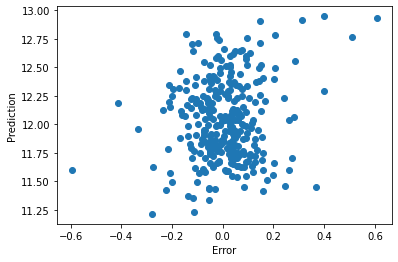

In [70]:
# We will also test for regression assumptions - Distribution of error terms
y_test_pred = lasso_model.predict(X_test)
plt.scatter(y_test - y_test_pred, y_test_pred)
plt.xlabel('Error')
plt.ylabel('Prediction')
plt.show()

**Observations:** 
-  It is evident the error terms are independent and doesn't display any visible pattern.

In [71]:
# Let us now compare the co-efficients for all the 3 regression models
allcoeff_df = pd.DataFrame(columns=['Linear', 'Ridge', 'Lasso'], index=X_test.columns)
allcoeff_df['Linear'] = lr.coef_
allcoeff_df['Ridge'] = ridge_model.coef_
allcoeff_df['Lasso'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
allcoeff_df

,Linear,Ridge,Lasso
MSSubClass,-2.209273e-02,-0.020746,-0.000000
LotFrontage,-1.153800e-02,0.009458,0.000000
LotArea,1.189593e-01,0.085531,0.080971
OverallQual,1.904771e-01,0.165741,0.203367
OverallCond,2.129453e-01,0.147085,0.182802
MasVnrArea,1.037248e-02,0.027098,0.007928
ExterQual,-2.905883e-02,0.024711,0.000000
ExterCond,3.795758e-03,0.004863,0.000000
BsmtQual,4.671032e-02,0.050382,0.036380
BsmtExposure,3.855759e-02,0.041319,0.037422


**Observations:** 
-  The model has worked perfectly - **Ridge regression** has pushed the non-significant coefficients **toward ZERO** while 
-  **Lasso regression** has converted the non-significant coefficients **to ZERO**

#### Let us see what the important features suggested by Lasso

In [72]:
np.abs(allcoeff_df.Lasso).sort_values(ascending=False).head(10)

GrLivArea           0.422893
MSZoning_C (all)    0.235105
OverallQual         0.203367
TotalBsmtSF         0.195082
OverallCond         0.182802
NeighborhoodGrp     0.157504
Fireplaces          0.122981
GarageCars          0.109858
Age                 0.103620
GarageArea          0.100037
Name: Lasso, dtype: float64

#### Let us see what the important features suggested by Ridge

In [73]:
np.abs(allcoeff_df.Ridge).sort_values(ascending=False).head(10)

GrLivArea           0.184700
OverallQual         0.165741
TotalBsmtSF         0.149432
OverallCond         0.147085
NeighborhoodGrp     0.141493
1stFlrSF            0.140588
MSZoning_C (all)    0.127112
Fireplaces          0.112990
GarageArea          0.095865
GarageCars          0.091833
Name: Ridge, dtype: float64

## 5. Conclusion

- Regularized models (ridge and lasso) performs far better than the linear regression model with R2 scores 89% approx for both train and test datasets.
- The optimal hyperparameter (alpha) for ridge and lasso models are 10 and 0.001 respectively.
- Ridge and Lasso models are more generalizable and robust when compared to linear regression model since there is not much difference between the R2 scores of both train and the test data.
- Lasso has reduced the complexity of the model by pushing the coefficients of few of the predictors to zero.
- Since scaling is done on the data before building a model, the coefficients can be compared for it's importance.
- Few of the important predictors include - `GrLivArea`, `TotalBsmtSF`, `OverallCond`, `Age`, `OverallQual` among others.
- The target variable `SalePrice` is log transformed before building a model. To get the actual value from the model predictions, we have taken an inverse log/ exponential.